#### Logistic Regression and Exploratory Data Analysis
#### Ogbonnia,Pleasure Nwannneka
#### WTF/2025/761
#### ogbonniapleasure@outlook.com

##### Overview to understand which have direct and clear impact on employee retention

In [286]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [288]:
HR_Data = pd.read_csv("HR_comma_sep 1(in).csv")
HR_Data.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [289]:
HR_Data.shape

(14999, 10)

In [292]:
HR_Data.duplicated().sum()

3008

In [293]:
HR_Data.drop_duplicates(inplace = True)

In [295]:
HR_Data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

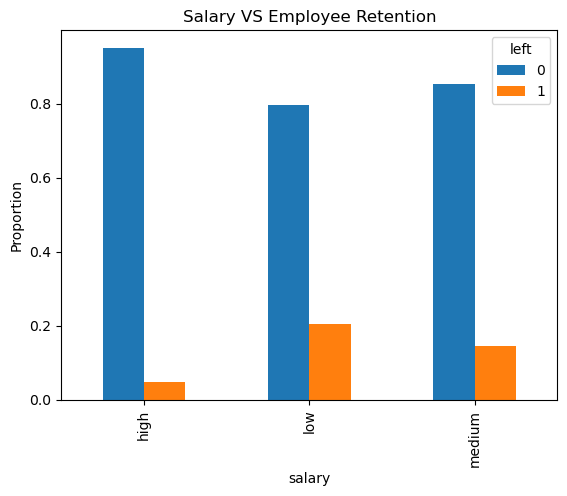

In [297]:
### Impact of Salaries on retention
salary_retention = pd.crosstab(HR_Data["salary"],HR_Data["left"],normalize = "index")

salary_retention.plot(kind="bar")
plt.title("Salary VS Employee Retention")
plt.ylabel("Proportion")
plt.show()

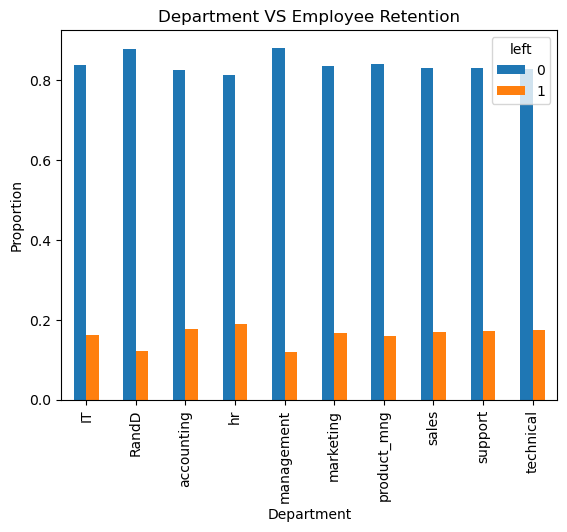

In [299]:
### Departments Retention
Departmental_retention = pd.crosstab(HR_Data["Department"], HR_Data["left"],normalize = "index")

Departmental_retention.plot(kind="bar")
plt.title("Department VS Employee Retention")
plt.ylabel("Proportion")
plt.show()

### Logistic Regression Model

In [302]:
### Encode Categorical Variable
HR_Data_encoded = pd.get_dummies(HR_Data, columns= ["salary","Department"],drop_first= True)

In [303]:
### Define Features and Target
X = HR_Data_encoded.drop("left",axis =1)
y = HR_Data_encoded["left"]

In [304]:
###  Split to test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state= 42)

In [305]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
397,0.09,0.79,6,293,5,0,0,True,False,False,False,False,False,False,False,True,False,False
3107,0.74,0.96,4,154,4,0,0,False,True,False,False,False,False,False,False,False,True,False
9331,0.81,0.97,4,212,2,0,0,True,False,False,False,False,False,False,False,True,False,False
357,0.37,0.54,2,149,3,0,0,True,False,False,False,False,False,False,False,False,True,False
1326,0.10,0.77,6,272,4,0,0,True,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,0.70,0.74,3,212,3,0,0,True,False,False,False,False,False,False,False,True,False,False
10440,0.87,0.73,5,111,4,0,0,False,False,False,False,False,True,False,False,False,False,False
3077,0.81,0.66,3,181,2,1,0,False,True,False,False,False,False,False,False,True,False,False
6113,0.70,0.98,4,146,3,0,0,True,False,False,False,False,False,True,False,False,False,False


In [306]:
y_test

397      1
3107     0
9331     0
357      1
1326     1
        ..
9322     0
10440    0
3077     0
6113     0
3794     0
Name: left, Length: 2399, dtype: int64

In [308]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression(max_iter=1000)

In [309]:
Model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [315]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
397,0.09,0.79,6,293,5,0,0,True,False,False,False,False,False,False,False,True,False,False
3107,0.74,0.96,4,154,4,0,0,False,True,False,False,False,False,False,False,False,True,False
9331,0.81,0.97,4,212,2,0,0,True,False,False,False,False,False,False,False,True,False,False
357,0.37,0.54,2,149,3,0,0,True,False,False,False,False,False,False,False,False,True,False
1326,0.10,0.77,6,272,4,0,0,True,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,0.70,0.74,3,212,3,0,0,True,False,False,False,False,False,False,False,True,False,False
10440,0.87,0.73,5,111,4,0,0,False,False,False,False,False,True,False,False,False,False,False
3077,0.81,0.66,3,181,2,1,0,False,True,False,False,False,False,False,False,True,False,False
6113,0.70,0.98,4,146,3,0,0,True,False,False,False,False,False,True,False,False,False,False


In [316]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
6426,0.86,0.56,5,141,2,0,0,False,True,False,False,False,False,False,False,True,False,False
288,0.82,0.91,5,232,5,0,0,True,False,False,False,False,False,False,False,False,False,True
5051,0.62,0.52,3,148,3,0,0,False,True,False,False,False,False,False,False,True,False,False
11132,0.43,0.74,4,129,6,0,0,False,True,False,False,True,False,False,False,False,False,False
3687,0.85,0.79,3,156,3,0,0,False,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11973,0.49,0.71,4,178,8,0,0,False,True,False,False,False,False,False,False,False,False,False
5200,0.77,0.52,4,216,3,0,0,False,True,False,False,False,False,False,False,True,False,False
5399,0.84,0.53,5,190,3,0,0,False,True,False,False,False,False,False,False,False,False,True
861,0.43,0.48,2,144,3,0,0,True,False,False,False,False,False,False,False,True,False,False


In [317]:
Model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [327]:
### Testing for accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = Model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8332638599416423
[[1929   69]
 [ 331   70]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1998
           1       0.50      0.17      0.26       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.58      2399
weighted avg       0.80      0.83      0.80      2399

